<a href="https://colab.research.google.com/github/OswaldVc/Datos/blob/main/TP4/tablas_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prueba de estado Icfes 2019-2. - Departamento de Santander, Colombia**

Los datos son obtenidos del siguiente enlace: [Link](https://www.datos.gov.co/Educaci-n/PUNTAJE-ICFES-POR-DEPARTAMENTOS/x9vi-iv8c)

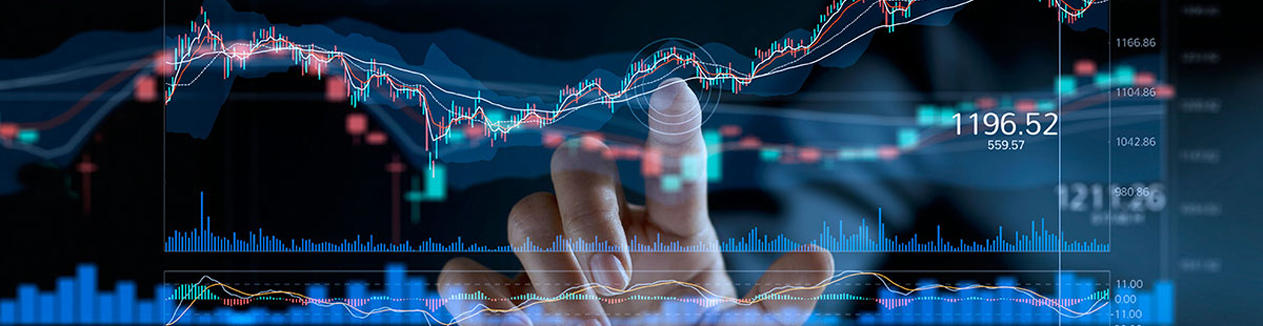

# Librerias y Módulos

In [ ]:
# ------- Importación de Módulos ------------

from locale import normalize
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import missingno as msno
## Data cleaning y data wrangling
import pandas            as pd
import numpy             as np
## Visualización
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings

sns.set_style("darkgrid") ## Estilo para los gráficos
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [ ]:
# ------------ Cargamos el archivo désde reporsitorio Github ----------------

url_base ="https://raw.githubusercontent.com/OswaldVc/Datos/main/data/"
name_data = "SANTANDER.csv"
Santander = pd.read_csv(url_base + name_data, index_col = 0)
Santander.head() #------------------------------------------------------ >>>> Lectura del conjunto de datos

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONINTERNET,...,COLE_CARACTER,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_FECHANACIMIENTO,ESTU_GENERO
ESTU_DEPTO_RESIDE,,,,,,,,,,,,,,,,,,,,,
SANTANDER,Estrato 3,3 a 4,Educación profesional completa,Educación profesional completa,Si,Si,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Más de 3 horas,...,TÉCNICO/ACADÉMICO,UNICA,57,65,63,66,60.0,313,08/14/2002 12:00:00 AM,M
SANTANDER,Estrato 2,5 a 6,Secundaria (Bachillerato) completa,Técnica o tecnológica incompleta,Si,Si,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Entre 30 y 60 minutos,...,TÉCNICO/ACADÉMICO,MAÑANA,65,72,69,50,59.0,318,05/03/2003 12:00:00 AM,M
SANTANDER,Estrato 4,1 a 2,Educación profesional completa,Educación profesional completa,Si,Si,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Más de 3 horas,...,TÉCNICO/ACADÉMICO,COMPLETA,63,67,73,59,73.0,330,01/18/2003 12:00:00 AM,M
SANTANDER,Estrato 1,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,No,No,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,30 minutos o menos,...,ACADÉMICO,TARDE,60,61,55,51,48.0,280,09/18/2001 12:00:00 AM,M
SANTANDER,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Primaria completa,Si,No,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Entre 1 y 3 horas,...,TÉCNICO,NOCHE,44,44,40,38,37.0,206,08/21/2002 12:00:00 AM,M


In [ ]:
Santander.shape #------------------------------------------------------- >>>> Tamaño del DataFrame 25.473 filas * 23 columnas

(25473, 23)

In [ ]:
#liempieza de fecha de nacimiento
sr=pd.to_datetime(Santander['ESTU_FECHANACIMIENTO'])
new=sr.reset_index()
new.sort_values('ESTU_FECHANACIMIENTO', inplace=True)
new["ESTU_FECHANACIMIENTO"].mean()
news=new.replace({"01/01/1900 12:00:00 AM":"2001-07-18 12:00:00 AM", "2019-05-05 00:00:00":"2001-07-18 12:00:00 AM", "2019-04-20 00:00:00":"2001-07-18 12:00:00","1900-01-30 00:00:00":"2001-07-18 12:00:00","2019-03-03 00:00:00":"2001-07-18 12:00:00","2019-02-15 00:00:00":"2001-07-18 12:00:00"
                 ,"2019-01-23 00:00:00:":"2001-07-18 12:00:00 AM","2019-01-23 00:00:00":"2001-07-18 12:00:00 AM","2019-01-10 00:00:00":"2001-07-18 12:00:00 AM","2018-12-12 00:00:00":"2001-07-18 12:00:00 AM",
                  '2018-12-05 00:00:00':"2001-07-18 12:00:00 AM","2018-11-07 00:00:00":"2001-07-18 12:00:00 AM","2018-08-07 00:00:00":"2001-07-18 12:00:00 AM","2013-07-14 00:00:00":"2001-07-18 12:00:00 AM",
                  "2013-02-10 00:00:00":"2001-07-18 12:00:00 AM","2013-01-22 00:00:00":"2001-07-18 12:00:00 AM","2012-12-20 00:00:00":"2001-07-18 12:00:00 AM","2012-12-17 00:00:00":"2001-07-18 12:00:00 AM",
                  "2012-12-13 00:00:00":"2001-07-18 12:00:00 AM","2012-08-18 00:00:00":"2001-07-18 12:00:00 AM","2011-01-12 00:00:00":"2001-07-18 12:00:00 AM","2010-11-25 00:00:00":"2001-07-18 12:00:00 AM",
                  "2010-11-03 00:00:00":"2001-07-18 12:00:00 AM","2010-08-03 00:00:00":"2001-07-18 12:00:00 AM","2010-05-06 00:00:00":"2001-07-18 12:00:00 AM","2010-04-12 00:00:00":"2001-07-18 12:00:00 AM",
                  "2010-02-10 00:00:00":"2001-07-18 12:00:00 AM","2009-12-17 00:00:00":"2001-07-18 12:00:00 AM","2009-07-15 00:00:00":"2001-07-18 12:00:00 AM","2009-07-01 00:00:00":"2001-07-18 12:00:00 AM",
                  "2008-06-28 00:00:00":"2001-07-18 12:00:00 AM","2008-03-02 00:00:00":"2001-07-18 12:00:00 AM","2007-07-07 00:00:00":"2001-07-18 12:00:00 AM","2007-01-07 00:00:00":"2001-07-18 12:00:00 AM",
                  "2006-08-17 00:00:00":"2001-07-18 12:00:00 AM","2006-06-02 00:00:00":"2001-07-18 12:00:00 AM","2006-01-25 00:00:00":"2001-07-18 12:00:00 AM","2006-01-06 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-06-05 00:00:00":"2001-07-18 12:00:00 AM","2005-05-13 00:00:00":"2001-07-18 12:00:00 AM","2005-04-03 00:00:00":"2001-07-18 12:00:00 AM","2005-03-13 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-03-06 00:00:00":"2001-07-18 12:00:00 AM","2005-02-16 00:00:00":"2001-07-18 12:00:00 AM","2005-02-10 00:00:00":"2001-07-18 12:00:00 AM","2005-02-06 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-01-25 00:00:00":"2001-07-18 12:00:00 AM","2005-01-05 00:00:00":"2001-07-18 12:00:00 AM"})
e=pd.to_datetime(news["ESTU_FECHANACIMIENTO"]).min()


In [ ]:
# ---------------------- Selección de las características que se usarán en el proyecto. ------------------------------------------------

vars = ["FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", 
        "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", 
        "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONINTERNET", "COLE_GENERO", "COLE_NATURALEZA", "COLE_CALENDARIO", 
        "COLE_CARACTER", "COLE_JORNADA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", 
        "PUNT_INGLES", "PUNT_GLOBAL", "ESTU_FECHANACIMIENTO","ESTU_GENERO" ]
        
df_stud = Santander[vars]  #--------------------------------------------- >>>> Creamos un nuevo DataFrame con las columnas
df_stud.head()  #-------------------------------------------------------- >>>> Lectura del nuevo DataFrame 

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONINTERNET,...,COLE_CARACTER,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_FECHANACIMIENTO,ESTU_GENERO
ESTU_DEPTO_RESIDE,,,,,,,,,,,,,,,,,,,,,
SANTANDER,Estrato 3,3 a 4,Educación profesional completa,Educación profesional completa,Si,Si,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Más de 3 horas,...,TÉCNICO/ACADÉMICO,UNICA,57,65,63,66,60.0,313,08/14/2002 12:00:00 AM,M
SANTANDER,Estrato 2,5 a 6,Secundaria (Bachillerato) completa,Técnica o tecnológica incompleta,Si,Si,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Entre 30 y 60 minutos,...,TÉCNICO/ACADÉMICO,MAÑANA,65,72,69,50,59.0,318,05/03/2003 12:00:00 AM,M
SANTANDER,Estrato 4,1 a 2,Educación profesional completa,Educación profesional completa,Si,Si,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Más de 3 horas,...,TÉCNICO/ACADÉMICO,COMPLETA,63,67,73,59,73.0,330,01/18/2003 12:00:00 AM,M
SANTANDER,Estrato 1,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,No,No,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,30 minutos o menos,...,ACADÉMICO,TARDE,60,61,55,51,48.0,280,09/18/2001 12:00:00 AM,M
SANTANDER,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Primaria completa,Si,No,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Entre 1 y 3 horas,...,TÉCNICO,NOCHE,44,44,40,38,37.0,206,08/21/2002 12:00:00 AM,M


In [ ]:
df_stud.shape

(25473, 23)

In [ ]:
#Identificar valores de una fila por el indice
df_stud.reset_index().loc[4149]
#df_stud.loc[4149]

ESTU_DEPTO_RESIDE                                           SANTANDER
FAMI_ESTRATOVIVIENDA                                        Estrato 2
FAMI_PERSONASHOGAR                                              3 a 4
FAMI_EDUCACIONPADRE              Secundaria (Bachillerato) incompleta
FAMI_EDUCACIONMADRE              Secundaria (Bachillerato) incompleta
FAMI_TIENEINTERNET                                                 No
FAMI_TIENECOMPUTADOR                                               Si
FAMI_COMELECHEDERIVADOS                        3 a 5 veces por semana
FAMI_COMECARNEPESCADOHUEVO                Todos o casi todos los días
FAMI_COMECEREALFRUTOSLEGUMBRE                  3 a 5 veces por semana
ESTU_DEDICACIONINTERNET                         Entre 30 y 60 minutos
COLE_GENERO                                                     MIXTO
COLE_NATURALEZA                                               OFICIAL
COLE_CALENDARIO                                                     A
COLE_CARACTER       

In [ ]:
#---------------------------------- Importante ------------------------------------------------------------------
# Se adicionó al nuevo DataFrame dos columnas:
# 1. FECHA_PRUEBA : Contiene la fecha del examen.
# 2. EDAD: Es esta se adiciona los valores de la edad del participante de la prueba.


#------------------Nuevo DataFrame con nuevas Variables ---------------------------------------------------------

new_df=df_stud.assign(FECHA_PRUEBA = "15/10/2019")
new_df["EDAD"] = ""
new_df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(new_df['ESTU_FECHANACIMIENTO'])
new_df['FECHA_PRUEBA'] = pd.to_datetime(new_df['FECHA_PRUEBA'])
new_dft=new_df.replace({"01/01/1900 12:00:00 AM":"2001-07-18 12:00:00 AM", "2019-05-05 00:00:00":"2001-07-18 12:00:00 AM", "2019-04-20 00:00:00":"2001-07-18 12:00:00","1900-01-30 00:00:00":"2001-07-18 12:00:00","2019-03-03 00:00:00":"2001-07-18 12:00:00","2019-02-15 00:00:00":"2001-07-18 12:00:00"
                 ,"2019-01-23 00:00:00:":"2001-07-18 12:00:00 AM","2019-01-23 00:00:00":"2001-07-18 12:00:00 AM","2019-01-10 00:00:00":"2001-07-18 12:00:00 AM","2018-12-12 00:00:00":"2001-07-18 12:00:00 AM",
                  '2018-12-05 00:00:00':"2001-07-18 12:00:00 AM","2018-11-07 00:00:00":"2001-07-18 12:00:00 AM","2018-08-07 00:00:00":"2001-07-18 12:00:00 AM","2013-07-14 00:00:00":"2001-07-18 12:00:00 AM",
                  "2013-02-10 00:00:00":"2001-07-18 12:00:00 AM","2013-01-22 00:00:00":"2001-07-18 12:00:00 AM","2012-12-20 00:00:00":"2001-07-18 12:00:00 AM","2012-12-17 00:00:00":"2001-07-18 12:00:00 AM",
                  "2012-12-13 00:00:00":"2001-07-18 12:00:00 AM","2012-08-18 00:00:00":"2001-07-18 12:00:00 AM","2011-01-12 00:00:00":"2001-07-18 12:00:00 AM","2010-11-25 00:00:00":"2001-07-18 12:00:00 AM",
                  "2010-11-03 00:00:00":"2001-07-18 12:00:00 AM","2010-08-03 00:00:00":"2001-07-18 12:00:00 AM","2010-05-06 00:00:00":"2001-07-18 12:00:00 AM","2010-04-12 00:00:00":"2001-07-18 12:00:00 AM",
                  "2010-02-10 00:00:00":"2001-07-18 12:00:00 AM","2009-12-17 00:00:00":"2001-07-18 12:00:00 AM","2009-07-15 00:00:00":"2001-07-18 12:00:00 AM","2009-07-01 00:00:00":"2001-07-18 12:00:00 AM",
                  "2008-06-28 00:00:00":"2001-07-18 12:00:00 AM","2008-03-02 00:00:00":"2001-07-18 12:00:00 AM","2007-07-07 00:00:00":"2001-07-18 12:00:00 AM","2007-01-07 00:00:00":"2001-07-18 12:00:00 AM",
                  "2006-08-17 00:00:00":"2001-07-18 12:00:00 AM","2006-06-02 00:00:00":"2001-07-18 12:00:00 AM","2006-01-25 00:00:00":"2001-07-18 12:00:00 AM","2006-01-06 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-06-05 00:00:00":"2001-07-18 12:00:00 AM","2005-05-13 00:00:00":"2001-07-18 12:00:00 AM","2005-04-03 00:00:00":"2001-07-18 12:00:00 AM","2005-03-13 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-03-06 00:00:00":"2001-07-18 12:00:00 AM","2005-02-16 00:00:00":"2001-07-18 12:00:00 AM","2005-02-10 00:00:00":"2001-07-18 12:00:00 AM","2005-02-06 00:00:00":"2001-07-18 12:00:00 AM",
                  "2005-01-25 00:00:00":"2001-07-18 12:00:00 AM","2005-01-05 00:00:00":"2001-07-18 12:00:00 AM"})
new_dft["ESTU_FECHANACIMIENTO"] = pd.to_datetime(new_dft["ESTU_FECHANACIMIENTO"])
#------------------Sobre el nuevo DataFrame se cálcula la edad --------------------------------------------------

new_dft['EDAD'] = (new_dft['FECHA_PRUEBA'] - new_dft['ESTU_FECHANACIMIENTO']).dt.days #- >>> Devuelve una serie con los dias en formato int64.
#new_df['EDAD'] = new_df['EDAD']/365.2425 # ------------------------------------------ >>> Transformando en año.
new_dft['EDAD'] = new_dft['EDAD']/365       # ------------------------------------------ >>> Transformando en año.
new_dft['EDAD'] = new_dft['EDAD'].astype(int)  # -------------------------------------- >>> Convirtiendo a entero.


In [ ]:
new_dft.info() #---------------------------------------- >>>> Mostramos la información generalizada del nuevo DataFrame << new_df >> con el método .info()

<class 'pandas.core.frame.DataFrame'>
Index: 25473 entries, SANTANDER to SANTANDER
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FAMI_ESTRATOVIVIENDA           25473 non-null  object        
 1   FAMI_PERSONASHOGAR             25099 non-null  object        
 2   FAMI_EDUCACIONPADRE            25106 non-null  object        
 3   FAMI_EDUCACIONMADRE            24676 non-null  object        
 4   FAMI_TIENEINTERNET             25105 non-null  object        
 5   FAMI_TIENECOMPUTADOR           25111 non-null  object        
 6   FAMI_COMELECHEDERIVADOS        24596 non-null  object        
 7   FAMI_COMECARNEPESCADOHUEVO     25050 non-null  object        
 8   FAMI_COMECEREALFRUTOSLEGUMBRE  24590 non-null  object        
 9   ESTU_DEDICACIONINTERNET        24240 non-null  object        
 10  COLE_GENERO                    25473 non-null  object        
 11  COLE_NAT

# ***Limpieza de datos de nuestro DataFrame***

# 1. Consultar si hay datos faltantes por columna en el DataFrame

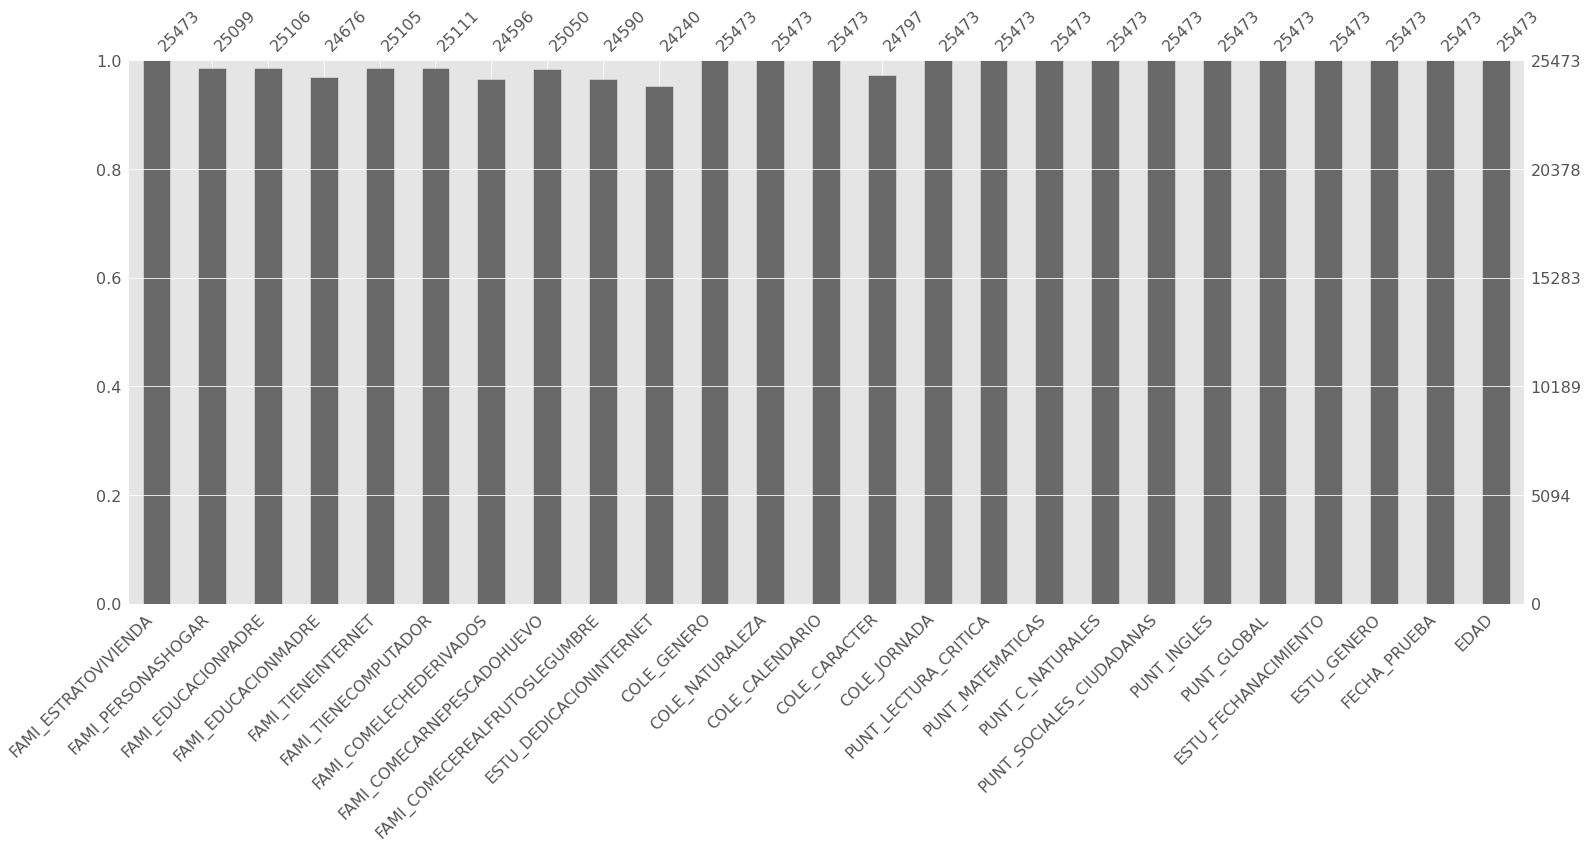

In [ ]:
#---------------------------------- Importante --------------------------------------------------------
# La función matrix de Missingno permite ver de una forma visual dónde se encuentran los valores nulos -
# en un conjunto de datos. Función a la que únicamente se le debe pasar el conjunto de datos.
# Finalmente, Missingno también cuenta con una gráfica para visualizar la cantidad de valores - 
# nulos que existe en cada una de las características. Esto es, ver su nivel de completitud. 
# Para lo que se debe usar la función bar().

msno.bar(new_dft) # -----------------------------------------  >>>>>> Le pasamos como argumento a la función msno nuestro DataFrame

La gráfica anterior representa de manera visual la cantidad de valores ***NO*** nulos para cada una de las diferentes características (Columnas), la parte superior de las barras muestra la cantidad de elemnetos dentro de la columna, parte inferior nombre de la columna.
[Guía](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)




In [ ]:
new_dft.isnull().sum() # ----------------------------------- >>>>  Ahora podemos calcular el número de datos nulos que hay por columna:

FAMI_ESTRATOVIVIENDA                0
FAMI_PERSONASHOGAR                374
FAMI_EDUCACIONPADRE               367
FAMI_EDUCACIONMADRE               797
FAMI_TIENEINTERNET                368
FAMI_TIENECOMPUTADOR              362
FAMI_COMELECHEDERIVADOS           877
FAMI_COMECARNEPESCADOHUEVO        423
FAMI_COMECEREALFRUTOSLEGUMBRE     883
ESTU_DEDICACIONINTERNET          1233
COLE_GENERO                         0
COLE_NATURALEZA                     0
COLE_CALENDARIO                     0
COLE_CARACTER                     676
COLE_JORNADA                        0
PUNT_LECTURA_CRITICA                0
PUNT_MATEMATICAS                    0
PUNT_C_NATURALES                    0
PUNT_SOCIALES_CIUDADANAS            0
PUNT_INGLES                         0
PUNT_GLOBAL                         0
ESTU_FECHANACIMIENTO                0
ESTU_GENERO                         0
FECHA_PRUEBA                        0
EDAD                                0
dtype: int64

 # 2. Llenado de datos con la clase más común





In [ ]:
df_clean = new_dft.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.isnull().sum() # ----------------------------------- >>>>  Se valida de nuevo que no tengamos datos nulos

FAMI_ESTRATOVIVIENDA             0
FAMI_PERSONASHOGAR               0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TIENEINTERNET               0
FAMI_TIENECOMPUTADOR             0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
ESTU_DEDICACIONINTERNET          0
COLE_GENERO                      0
COLE_NATURALEZA                  0
COLE_CALENDARIO                  0
COLE_CARACTER                    0
COLE_JORNADA                     0
PUNT_LECTURA_CRITICA             0
PUNT_MATEMATICAS                 0
PUNT_C_NATURALES                 0
PUNT_SOCIALES_CIUDADANAS         0
PUNT_INGLES                      0
PUNT_GLOBAL                      0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                      0
FECHA_PRUEBA                     0
EDAD                             0
dtype: int64

In [ ]:
df_clean.shape

(25473, 25)

# 3. Retoques a las columnas para un mejor manejo de los datos:

In [ ]:
#------------------ Genero ----------------------------------------------------------------------------------------------------
# Si el género del estudiante es Femenino, se reemplaza con el valor entero 0
# Si el género del estudiante  Masculino, se reemplaza con el valor entero 1

df_clean.loc[df_clean['ESTU_GENERO']=='F', 'ESTU_GENERO']='FEMENINO'
df_clean.loc[df_clean['ESTU_GENERO']=='M', 'ESTU_GENERO']='MASCULINO'


#----------------- Estudio Dedicacion Internet----------------------------------------------------------------------------------
#Se asume que si el estudiante navega menos de 30 minutos se asume como 15 minutos.
#Se asume que si el estudiante navega más de 1 y 3 horas se asume como 180 minutos
# Como sigue.......

df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET']=='No Navega Internet', 'ESTU_DEDICACIONINTERNET']=0
df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET']=='30 minutos o menos', 'ESTU_DEDICACIONINTERNET']=15
df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET']=='Entre 30 y 60 minutos', 'ESTU_DEDICACIONINTERNET']=45
df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET']=='Entre 1 y 3 horas', 'ESTU_DEDICACIONINTERNET']=120
df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET']=='Más de 3 horas', 'ESTU_DEDICACIONINTERNET']=180

# -----------------Estrato ------------------------------------------------------------------------------------------------------
# Reemplazo de los estratos por valores numéricos
# Las personas "Sin Estrato" se consideran como estrato 0

df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Sin Estrato', 'FAMI_ESTRATOVIVIENDA']=0
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 1', 'FAMI_ESTRATOVIVIENDA']=1
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 2', 'FAMI_ESTRATOVIVIENDA']=2
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 3', 'FAMI_ESTRATOVIVIENDA']=3
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 4', 'FAMI_ESTRATOVIVIENDA']=4
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 5', 'FAMI_ESTRATOVIVIENDA']=5
df_clean.loc[df_clean['FAMI_ESTRATOVIVIENDA']=='Estrato 6', 'FAMI_ESTRATOVIVIENDA']=6



#----------------- Integrantes en una familia -----------------------------------------------------------------------------------
#Se apróximo al dato al más alto:


df_clean.loc[df_clean['FAMI_PERSONASHOGAR']=='1 a 2', 'FAMI_PERSONASHOGAR']=2
df_clean.loc[df_clean['FAMI_PERSONASHOGAR']=='3 a 4', 'FAMI_PERSONASHOGAR']=4
df_clean.loc[df_clean['FAMI_PERSONASHOGAR']=='5 a 6', 'FAMI_PERSONASHOGAR']=6
df_clean.loc[df_clean['FAMI_PERSONASHOGAR']=='7 a 8', 'FAMI_PERSONASHOGAR']=8


#----------------- Leche o Derivados ---------------------------------------------------------------------------------------------
#Se apróximo al dato al más alto:

df_clean.loc[df_clean['FAMI_COMELECHEDERIVADOS']=='Nunca o rara vez comemos eso', 'FAMI_COMELECHEDERIVADOS']=0
df_clean.loc[df_clean['FAMI_COMELECHEDERIVADOS']=='1 o 2 veces por semana', 'FAMI_COMELECHEDERIVADOS']=2
df_clean.loc[df_clean['FAMI_COMELECHEDERIVADOS']=='3 a 5 veces por semana', 'FAMI_COMELECHEDERIVADOS']=4
df_clean.loc[df_clean['FAMI_COMELECHEDERIVADOS']=='Todos o casi todos los días', 'FAMI_COMELECHEDERIVADOS']=7



#----------------- Carne pescado huevo -------------------------------------------------------------------------------------------
#Se apróximo al dato al más alto:

df_clean.loc[df_clean['FAMI_COMECARNEPESCADOHUEVO']=='Nunca o rara vez comemos eso', 'FAMI_COMECARNEPESCADOHUEVO']=0
df_clean.loc[df_clean['FAMI_COMECARNEPESCADOHUEVO']=='1 o 2 veces por semana', 'FAMI_COMECARNEPESCADOHUEVO']=2
df_clean.loc[df_clean['FAMI_COMECARNEPESCADOHUEVO']=='3 a 5 veces por semana', 'FAMI_COMECARNEPESCADOHUEVO']=4
df_clean.loc[df_clean['FAMI_COMECARNEPESCADOHUEVO']=='Todos o casi todos los días', 'FAMI_COMECARNEPESCADOHUEVO']=7


#----------------- Cereal Frutos Legumbre -----------------------------------------------------------------------------------------
#Se apróximo al dato al más alto:

df_clean.loc[df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE']=='Nunca o rara vez comemos eso', 'FAMI_COMECEREALFRUTOSLEGUMBRE']=0
df_clean.loc[df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE']=='1 o 2 veces por semana', 'FAMI_COMECEREALFRUTOSLEGUMBRE']=2
df_clean.loc[df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE']=='3 a 5 veces por semana', 'FAMI_COMECEREALFRUTOSLEGUMBRE']=4
df_clean.loc[df_clean['FAMI_COMECEREALFRUTOSLEGUMBRE']=='Todos o casi todos los días', 'FAMI_COMECEREALFRUTOSLEGUMBRE']=7



# ---------------------------------------------Filtro para carácteres atípicos ------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------



#----------------- Estudio del padre ------------------------------------------------------------------------------------------------

# Postgrado = --------- > 7
# Profesional = ------- > 6
# Técnico = ----------- > 5
# Bachiller = --------- > 4
# Básico Primaria = --- > 3
# Sin estudios = ------ > 2
# Analfabeta = -------- > 1

df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Educación profesional completa', 'FAMI_EDUCACIONPADRE']=6
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONPADRE']=4
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Secundaria (Bachillerato) incompleta', 'FAMI_EDUCACIONPADRE']=3
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Primaria incompleta', 'FAMI_EDUCACIONPADRE']=2
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Ninguno', 'FAMI_EDUCACIONPADRE']=1
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Postgrado', 'FAMI_EDUCACIONPADRE']=7
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Primaria completa', 'FAMI_EDUCACIONPADRE']=3
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Técnica o tecnológica completa', 'FAMI_EDUCACIONPADRE']=5
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='Técnica o tecnológica incompleta', 'FAMI_EDUCACIONPADRE']=4
df_clean.loc[df_clean['FAMI_EDUCACIONPADRE']=='No sabe', 'FAMI_EDUCACIONPADRE']=3

#----------------- Estudio del Madre -----------------------------------------------------------------------------------------------

# Postgrado = --------- > 7
# Profesional = ------- > 6
# Técnico = ----------- > 5
# Bachiller = --------- > 4
# Básico Primaria = --- > 3
# Sin estudios = ------ > 2
# Analfabeta = -------- > 1

df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Educación profesional completa', 'FAMI_EDUCACIONMADRE']=6
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE']=4
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Secundaria (Bachillerato) incompleta', 'FAMI_EDUCACIONMADRE']=3
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Primaria incompleta', 'FAMI_EDUCACIONMADRE']=2
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Ninguno', 'FAMI_EDUCACIONMADRE']=1
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Postgrado', 'FAMI_EDUCACIONMADRE']=7
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Primaria completa', 'FAMI_EDUCACIONMADRE']=3
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Técnica o tecnológica completa', 'FAMI_EDUCACIONMADRE']=5
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='Técnica o tecnológica incompleta', 'FAMI_EDUCACIONMADRE']=4
df_clean.loc[df_clean['FAMI_EDUCACIONMADRE']=='No sabe', 'FAMI_EDUCACIONMADRE']=3



#------------------------------------------------------------------------------------------------------------------------------------
#Se elimina el registro en donde exista el caracter '-' en cualquiera de las características.


df_clean = df_clean[df_clean.FAMI_ESTRATOVIVIENDA !='-']
df_clean = df_clean[df_clean.FAMI_PERSONASHOGAR !='-']
df_clean = df_clean[df_clean.FAMI_EDUCACIONPADRE !='-']
df_clean = df_clean[df_clean.FAMI_EDUCACIONMADRE !='-']
df_clean = df_clean[df_clean.FAMI_TIENEINTERNET !='-']
df_clean = df_clean[df_clean.FAMI_TIENECOMPUTADOR !='-']
df_clean = df_clean[df_clean.FAMI_COMELECHEDERIVADOS !='-']
df_clean = df_clean[df_clean.FAMI_COMECARNEPESCADOHUEVO !='-']
df_clean = df_clean[df_clean.FAMI_COMECEREALFRUTOSLEGUMBRE !='-']
df_clean = df_clean[df_clean.ESTU_DEDICACIONINTERNET !='-']
df_clean = df_clean[df_clean.COLE_GENERO !='-']
df_clean = df_clean[df_clean.COLE_NATURALEZA !='-']
df_clean = df_clean[df_clean.COLE_CALENDARIO !='-']
df_clean = df_clean[df_clean.COLE_CARACTER !='-']
df_clean = df_clean[df_clean.COLE_JORNADA !='-']
df_clean = df_clean[df_clean.PUNT_LECTURA_CRITICA !='-']
df_clean = df_clean[df_clean.PUNT_MATEMATICAS !='-']
df_clean = df_clean[df_clean.PUNT_C_NATURALES !='-']
df_clean = df_clean[df_clean.PUNT_SOCIALES_CIUDADANAS !='-']
df_clean = df_clean[df_clean.PUNT_INGLES !='-']
df_clean = df_clean[df_clean.PUNT_GLOBAL !='-']
df_clean = df_clean[df_clean.ESTU_FECHANACIMIENTO !='-']
df_clean = df_clean[df_clean.ESTU_GENERO !='-']
df_clean = df_clean[df_clean.FECHA_PRUEBA !='-']
df_clean = df_clean[df_clean.EDAD !='-']



In [ ]:
df_clean.shape

(23095, 25)

In [ ]:
#Reinicia los índices para el conjunto de datos ya modificado
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_DEDICACIONINTERNET,...,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_FECHANACIMIENTO,ESTU_GENERO,FECHA_PRUEBA,EDAD
0,3,4,6,6,Si,Si,2,4,4,180,...,57,65,63,66,60.0,313,2002-08-14,MASCULINO,2019-10-15,17
1,2,6,4,4,Si,Si,2,2,4,45,...,65,72,69,50,59.0,318,2003-05-03,MASCULINO,2019-10-15,16
2,4,2,6,6,Si,Si,7,7,7,180,...,63,67,73,59,73.0,330,2003-01-18,MASCULINO,2019-10-15,16
3,1,4,4,3,No,No,0,2,0,15,...,60,61,55,51,48.0,280,2001-09-18,MASCULINO,2019-10-15,18
4,2,4,3,3,Si,No,4,2,4,120,...,44,44,40,38,37.0,206,2002-08-21,MASCULINO,2019-10-15,17


In [ ]:
df_clean.shape

(23095, 25)

In [ ]:
#Pasar los datos datos flotantes de la columna PUNT_INGLES a enteros
df_clean['PUNT_INGLES'] = df_clean['PUNT_INGLES'].apply(np.int64)

In [ ]:
df_clean.describe(percentiles = [0.70,0.75,0.80,0.85,0.9,0.95]).T

,count,mean,std,min,50%,70%,75%,80%,85%,90%,95%,max
PUNT_LECTURA_CRITICA,23095.0,55.386014,10.368139,23.0,56.0,61.0,63.0,65.0,67.0,69.0,72.0,100.0
PUNT_MATEMATICAS,23095.0,55.519506,11.920406,16.0,56.0,62.0,64.0,66.0,68.0,71.0,74.0,100.0
PUNT_C_NATURALES,23095.0,52.453042,10.946576,22.0,52.0,58.0,60.0,62.0,64.0,67.0,71.0,100.0
PUNT_SOCIALES_CIUDADANAS,23095.0,49.751158,12.563687,18.0,49.0,57.0,59.0,61.0,64.0,67.0,71.0,100.0
PUNT_INGLES,23095.0,51.397835,12.503563,0.0,51.0,57.0,59.0,61.0,64.0,68.0,74.0,100.0
PUNT_GLOBAL,23095.0,265.667634,51.903960,129.0,264.0,294.0,303.0,312.0,323.0,335.0,354.0,448.0
EDAD,23095.0,17.262784,2.348632,14.0,17.0,17.0,18.0,18.0,18.0,19.0,19.0,65.0


#De la tabla anteior podemos observar que:

1. Santander tuvo un mejor desempeño en matemáticas respecto a las demas marterias, la media de puntuación es de 55.5
2. El 75% del puntaje global es 303 puntos de un total de 448 como máximo.
3. El 85% de las edades son de 18 años o menos.
4. Solo 5% alcanzo un puntaje mayor a 354 en el ponderado goblal de la prueba.
5. Solo el 5% o menos eran personas mayores de 19 años.
6. Se puede identificar que las personas que presentaron el axamen prueba saber, tienen edades que estan entre los 14 años y los 65 años.
7. El puntaje global maximo es de 448 y el valor minimo es de 129. y el pruntaje promedio de la poblacion santandereana fue de 265.

In [ ]:
# identificar el indice minimo de una columna
df_clean['EDAD'].idxmin()

873

# Matriz de correlación del dataframe


In [ ]:
df_clean.corr()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,EDAD
PUNT_LECTURA_CRITICA,1.000000,0.732355,0.759027,0.801471,0.696603,0.897659,-0.218020
PUNT_MATEMATICAS,0.732355,1.000000,0.810381,0.734097,0.682750,0.899246,-0.257598
PUNT_C_NATURALES,0.759027,0.810381,1.000000,0.792553,0.721553,0.921226,-0.241422
PUNT_SOCIALES_CIUDADANAS,0.801471,0.734097,0.792553,1.000000,0.702135,0.916451,-0.174802
PUNT_INGLES,0.696603,0.682750,0.721553,0.702135,1.000000,0.805810,-0.238617
PUNT_GLOBAL,0.897659,0.899246,0.921226,0.916451,0.805810,1.000000,-0.248187
EDAD,-0.218020,-0.257598,-0.241422,-0.174802,-0.238617,-0.248187,1.000000


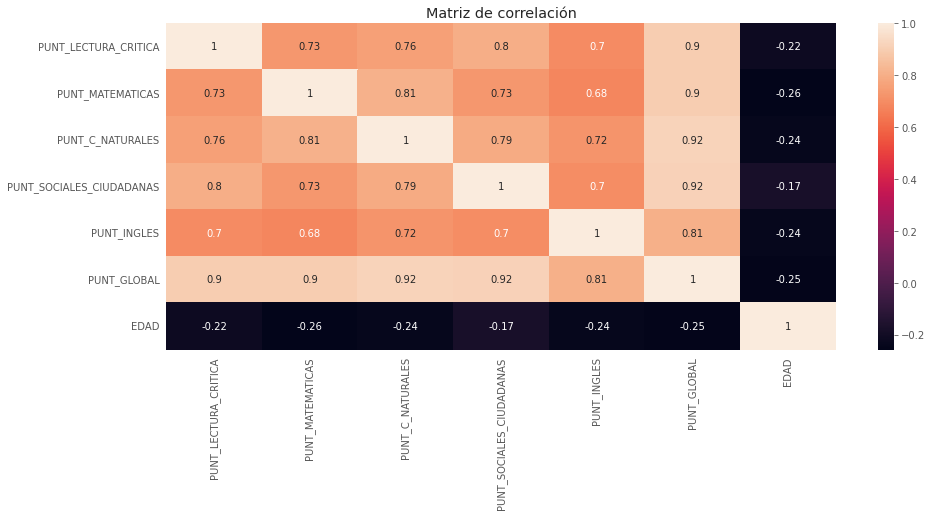

In [ ]:
plt.figure(figsize = (15,6)) 
sns.heatmap(df_clean.corr(), annot=True)
plt.title("Matriz de correlación")
plt.show()

**De la matriz de correlación anterior podemos concluir que:**
1. Todas las materias tienen un buena correlacion respecto al puntaje global.
2. La correlación de la edad con respecto a los puntajes es alta y negativa, lo que podria decir que a mayor edad se tiende a un puntaje global menor.

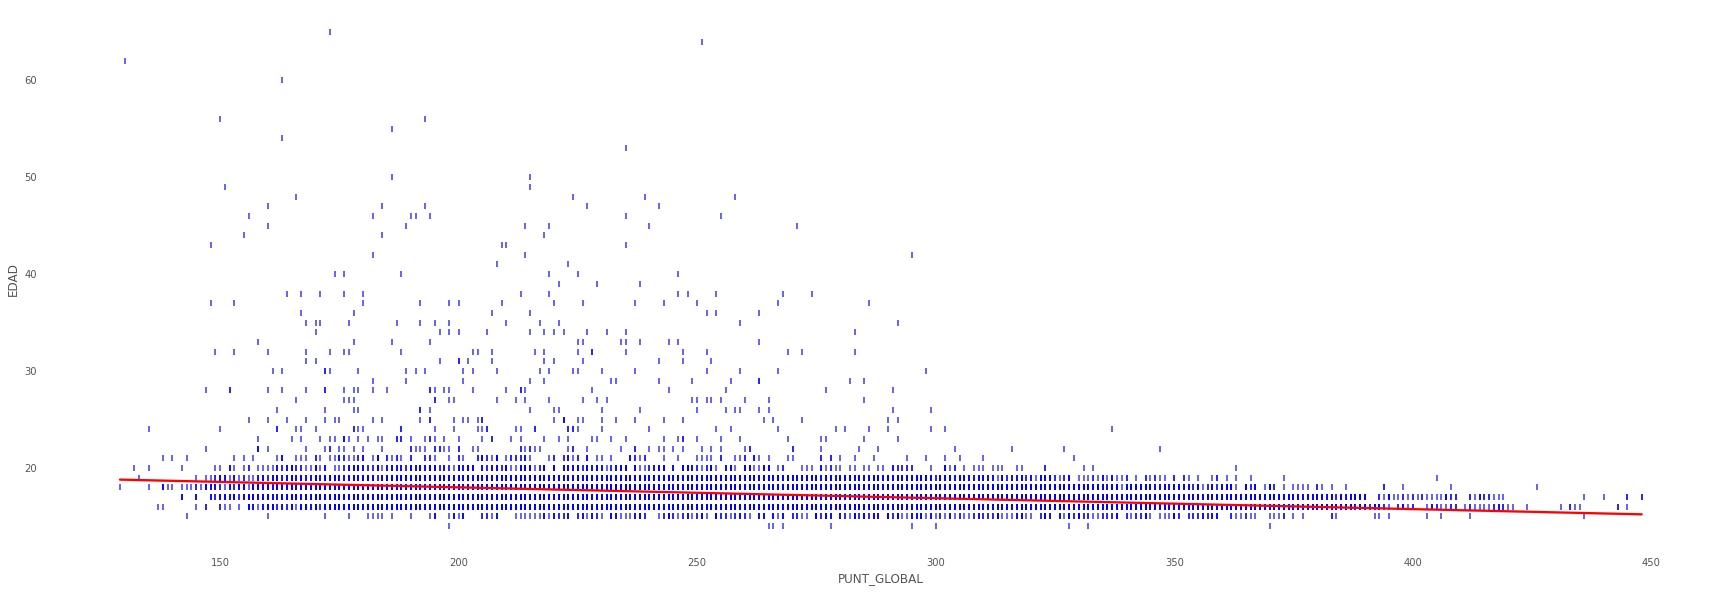

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (30,10))
ax = plt.axes()        
ax.yaxis.grid()
ax.xaxis.grid()

sns.regplot(data = df_clean, x = "PUNT_GLOBAL", y = "EDAD", 
            marker = "|" , # matplotlib marker code
            scatter_kws={"color": "blue"}, # Color puntos
            line_kws={"color": "red"} ) # Color recta
ax.set_facecolor('w')
plt.show()

Se grafica la correlacion respecto al puntaje global y la edad, comprobando que a mayor edad se tiende a tener un menor puntaje.

# ¿Que género tuvo mayor presencia en la Prueba de estado Icfes?

1. Si el género del estudiante es Femenino, se reemplaza con el valor entero 0
2. Si el género del estudiante  Masculino, se reemplaza con el valor entero 1

In [ ]:
for i in np.unique(df_clean['ESTU_GENERO']):
    print (i, np.sum(df_clean['ESTU_GENERO']==i))

FEMENINO 12385
MASCULINO 10710


In [ ]:
## Frecuencia absoluta. (ni), para este caso el numero de veces que se repite una fila
frec_abs = df_clean["ESTU_GENERO"].value_counts()
frec_abs.rename("frec_abs", inplace = True)

FEMENINO     12385
MASCULINO    10710
Name: frec_abs, dtype: int64

In [ ]:
## Frecuencia relativa.
frec_rela = df_clean["ESTU_GENERO"].value_counts(normalize = True)
frec_rela.rename("frec_rela", inplace = True)

FEMENINO     0.536263
MASCULINO    0.463737
Name: frec_rela, dtype: float64

In [ ]:
## Frecuencia Porcentual.
frec_rela_porcen = df_clean["ESTU_GENERO"].value_counts(normalize = True)*100
frec_rela_porcen.rename("frec_rela_%", inplace = True)

FEMENINO     53.626326
MASCULINO    46.373674
Name: frec_rela_%, dtype: float64

In [ ]:
tabla_frecuencia = pd.concat([frec_abs,frec_rela,frec_rela_porcen],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs,frec_rela,frec_rela_%
FEMENINO,12385.0,0.536263,53.626326
MASCULINO,10710.0,0.463737,46.373674
TOTALES,23095.0,1.000000,100.000000


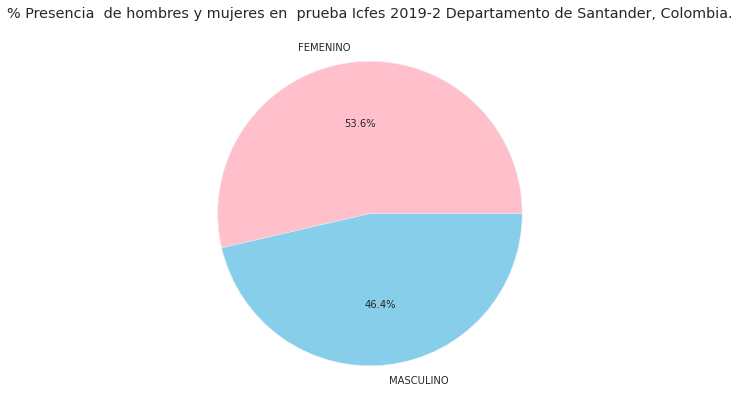

In [ ]:
## pie plot
plt.figure(figsize = (15,7))
plt.pie(tabla_frecuencia['frec_abs'],labels = tabla_frecuencia.index,
        colors = ["Pink", "skyblue"], autopct='%.1f%%')
plt.title("% Presencia  de hombres y mujeres en  prueba Icfes 2019-2 Departamento de Santander, Colombia.",)
plt.show()

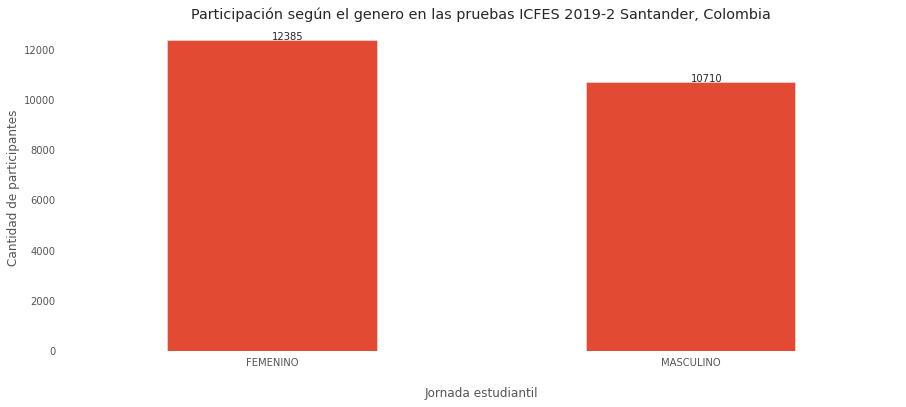

In [ ]:
plt.style.use("ggplot")     ## ------------------------------------------------------------------------->>> Libreria
plt.figure(figsize = (15,6))## ------------------------------------------------------------------------->>> Tamaño del plot
plt.title("Participación según el genero en las pruebas ICFES 2019-2 Santander, Colombia",) #----------->>> Título.
plt.xlabel("\nJornada estudiantil")        ## ---------------------------------------------------------->>> Etiqueta eje x
plt.ylabel("Cantidad de participantes")            ## -------------------------------------------------->>> Etiqueta eje y
tabla_frecuencia["frec_abs"].plot(kind="bar")

ax = plt.axes()        
ax.yaxis.grid()
ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia['frec_abs']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))
ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

# En cuanto a presencia de género podemos decir que:

1. En la prueba predomino el género Femenino, con presencia de **12.385** mujeres del un total de **23.095** participantes.
2. El porcentaje de presencia del sexo femenino es del **53.6%** frente al masculino con un **46.4%**


# Calculando las familias con  servicio de internet:

1. Los estudiantes que tengan servicio de internet son asignadas con un valor entero **1**
2. los estudiantes que no tengan servicio de internet son asignadas con un valor entero **0**

In [ ]:
for i in np.unique(df_clean['FAMI_TIENEINTERNET']):
    print (i, np.sum(df_clean['FAMI_TIENEINTERNET']==i))

No 8411
Si 14684


In [ ]:
round(pd.crosstab(df_clean['FAMI_ESTRATOVIVIENDA'], df_clean['FAMI_TIENEINTERNET'] , normalize = "index"),3)*100

FAMI_TIENEINTERNET,No,Si
FAMI_ESTRATOVIVIENDA,,
0,63.1,36.9
1,62.5,37.5
2,34.9,65.1
3,13.8,86.2
4,6.7,93.3
5,9.8,90.2
6,9.8,90.2


#En cuanto a las familias con servicio de internet y con computador, deducimos que:

In [ ]:
round(pd.crosstab(df_clean['FAMI_TIENEINTERNET'], df_clean['FAMI_TIENECOMPUTADOR'] , normalize = "index"),3)*100

FAMI_TIENECOMPUTADOR,No,Si
FAMI_TIENEINTERNET,,
No,77.2,22.8
Si,21.8,78.2


De las familias que no tienen internet el 77% tampoco tiene un computador, y se identifica que a menor estrato social, estas familias no cuentan con servicio a internet.

In [ ]:
frec_abs_internet = df_clean["FAMI_TIENEINTERNET"].value_counts()
frec_abs_internet.rename("frec_abs_internet", inplace = True)
Frecuencia_relativa_internet = df_clean["FAMI_TIENEINTERNET"].value_counts(normalize = True)
Frecuencia_relativa_internet.rename("Frecuencia_relativa_internet", inplace = True)
Frecuencia_relativa_porcentual_internet = df_clean["FAMI_TIENEINTERNET"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_internet.rename("frec_rela_%", inplace = True)

tabla_frecuencia = pd.concat([frec_abs_internet,Frecuencia_relativa_internet,Frecuencia_relativa_porcentual_internet],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_internet,Frecuencia_relativa_internet,frec_rela_%
Si,14684.0,0.635809,63.580862
No,8411.0,0.364191,36.419138
TOTALES,23095.0,1.000000,100.000000


#En cuanto a las familias con servicio de internet podemos informar que:

1. Predominan las familias con servicio de internet, las que si tienen el servicio son **14.684** familias, y las que no son ***8.411**
2. El porcentaje de acuerdo a la información anterior es, un **63.6%** con internet y un **36.4%** que no sobre el **100%** de los participantes. 
3. Podemos concluir que la Internet es un factor que incide postitivamente en los resultados, puesto que en la puntuación global de la prueba, los participantes con internet estan dentro de la media en rango de **275.739**, frente a los que no con un puntaje de **248.083**.


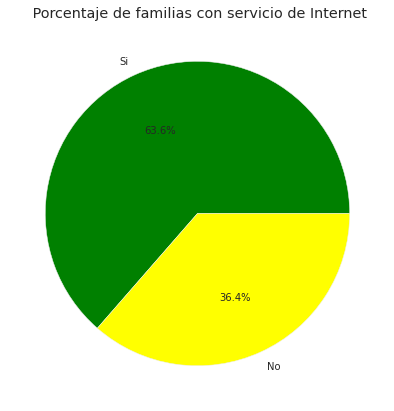

In [ ]:
## pie plot
plt.figure(figsize = (15,7))
plt.pie(tabla_frecuencia['frec_abs_internet'],labels = tabla_frecuencia.index,
        colors = ["Green", "Yellow"], autopct='%.1f%%')
plt.title(" Porcentaje de familias con servicio de Internet",)
plt.show()

# ¿La Internet es un factor de relevancia para el puntaje global?


In [ ]:
# -------------------- La misma cantidad para no alterar la medición -----------------

Coninternet = df_clean.loc[df_clean['FAMI_TIENEINTERNET']=="Si"][:14684]
SinnInternet = df_clean.loc[df_clean['FAMI_TIENEINTERNET']=="No"][:8411]

print ("Media Puntuaje Global Si: ",np.mean(Coninternet['PUNT_GLOBAL']), "Desviación Est: ",np.std(Coninternet['PUNT_GLOBAL']))
print ("Media Puntuntaje Global No: ",np.mean(SinnInternet['PUNT_GLOBAL']),"Desviación Est: " ,np.std(SinnInternet['PUNT_GLOBAL']))

Media Puntuaje Global Si:  275.73998910378646 Desviación Est:  52.53965001967062
Media Puntuntaje Global No:  248.0832243490667 Desviación Est:  45.73250597070618


In [ ]:
fig = px.box(df_clean, y = "PUNT_GLOBAL", color = "FAMI_TIENEINTERNET", 
             color_discrete_sequence = ["red","skyblue",])
fig.update_layout(xaxis_title = "¿La familia tiene internet?", yaxis_title = "Puntaje global")
fig.show()

Se puede identificar que las personas que tienen internet tienen puntaje mas alto que las personas que no cuentan con este servicio. los resultados anteriores se obtienen teniendo en cuenta los datos atipicos, para analizar estos datos realizamos el rango intercuartil y poder sacar esos datos del analisis.

In [ ]:
percentil_75 = df_clean["PUNT_GLOBAL"]<df_clean["PUNT_GLOBAL"].quantile(q = 0.75)
percentil_25 = df_clean["PUNT_GLOBAL"]>df_clean["PUNT_GLOBAL"].quantile(q = 0.25)
rango_in = df_clean[percentil_25 & percentil_75]

In [ ]:
fig = px.box(rango_in, y = "PUNT_GLOBAL", color = "FAMI_TIENEINTERNET", 
             color_discrete_sequence = ["red","skyblue",],
             category_orders={"FAMI_TIENEINTERNET":["Si","No"]})
fig.update_layout(xaxis_title = "¿La familia tiene internet?", yaxis_title = "Puntaje global")
fig.show()

Realizando el rango intercuartil, se identifico que no cambia el analisis a nivel general las personas que cuentan con servicio a internet tienen un mejor desempeño en la prueba.

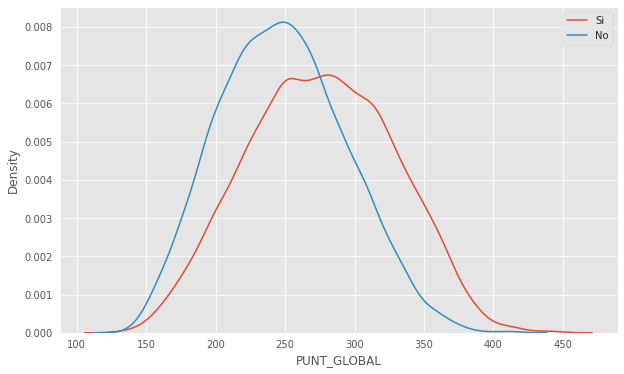

In [ ]:
plt.figure(figsize = (10,6))
si_int= df_clean[df_clean["FAMI_TIENEINTERNET"]=="Si"]
no_int= df_clean[df_clean["FAMI_TIENEINTERNET"]=="No"]
sns.kdeplot(data=si_int, x = "PUNT_GLOBAL", label = "Si")
sns.kdeplot(data=no_int, x = "PUNT_GLOBAL", label = "No")
plt.legend()
plt.show()

In [ ]:
fig = px.box(df_clean, y = "PUNT_GLOBAL", color = "FAMI_ESTRATOVIVIENDA", 
             color_discrete_sequence = ["red","skyblue","orange","green","grey","pink","turquoise"],
             category_orders={"FAMI_ESTRATOVIVIENDA":[0,1,2,3,4,5,6]}, facet_col="FAMI_TIENEINTERNET")
fig.update_layout(xaxis_title = "Estrato de vivienda", yaxis_title = "Puntaje global")
fig.show()

In [ ]:
fig = px.box(rango_in, y = "PUNT_GLOBAL", color = "FAMI_ESTRATOVIVIENDA", 
             color_discrete_sequence = ["red","skyblue","orange","green","grey","pink","turquoise"],
             category_orders={"FAMI_ESTRATOVIVIENDA":[0,1,2,3,4,5,6]}, facet_col="FAMI_TIENEINTERNET")
fig.update_layout(xaxis_title = "Estrato de vivienda", yaxis_title = "Puntaje global")
fig.show()

In [ ]:
## Frecuencia absoluta. (ni), para este caso el numero de veces que se repite una fila
frec_abs = df_clean["COLE_JORNADA"].value_counts()
frec_abs.rename("frec_abs", inplace = True)


MAÑANA      10949
COMPLETA     4212
TARDE        2693
UNICA        2139
NOCHE        1572
SABATINA     1530
Name: frec_abs, dtype: int64

In [ ]:
frec_rela = df_clean["COLE_JORNADA"].value_counts(normalize = True)
frec_rela.rename("frec_rela", inplace = True)

MAÑANA      0.474085
COMPLETA    0.182377
TARDE       0.116605
UNICA       0.092617
NOCHE       0.068067
SABATINA    0.066248
Name: frec_rela, dtype: float64

In [ ]:
frec_rela_porcen = df_clean["COLE_JORNADA"].value_counts(normalize = True)*100
frec_rela_porcen.rename("frec_rela_%", inplace = True)

MAÑANA      47.408530
COMPLETA    18.237714
TARDE       11.660533
UNICA        9.261745
NOCHE        6.806668
SABATINA     6.624811
Name: frec_rela_%, dtype: float64

In [ ]:
tabla_frecuencia = pd.concat([frec_abs,frec_rela,frec_rela_porcen],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs,frec_rela,frec_rela_%
MAÑANA,10949.0,0.474085,47.408530
COMPLETA,4212.0,0.182377,18.237714
TARDE,2693.0,0.116605,11.660533
UNICA,2139.0,0.092617,9.261745
NOCHE,1572.0,0.068067,6.806668
SABATINA,1530.0,0.066248,6.624811
TOTALES,23095.0,1.000000,100.000000


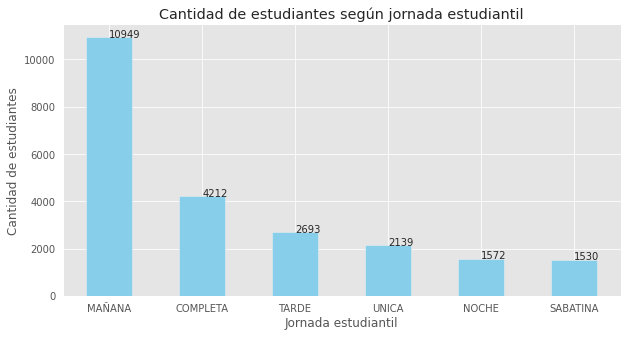

In [ ]:
plt.figure(figsize = (10,5))
tabla_frecuencia["frec_abs"].plot(kind="bar", color = "skyblue")
plt.title("Cantidad de estudiantes según jornada estudiantil",)
plt.xlabel("Jornada estudiantil")
plt.ylabel("Cantidad de estudiantes")


plt.xticks(rotation = 0)
for label, annot in enumerate(tabla_frecuencia['frec_abs']):  
  plt.annotate(str(annot),xy=(label,annot+0.3))
ax.set_facecolor('w')
plt.show()

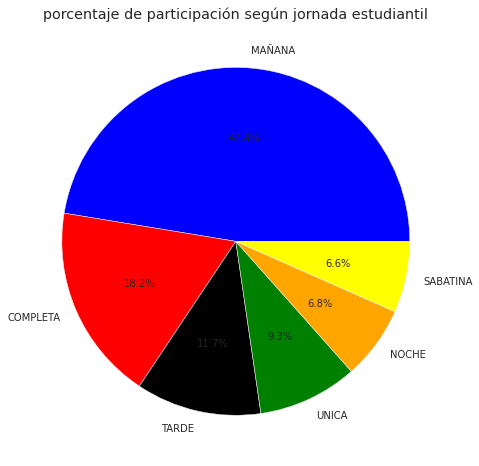

In [ ]:
## pie plot
plt.figure(figsize = (15,8))
plt.pie(tabla_frecuencia['frec_abs'],labels = tabla_frecuencia.index,
        colors = ["b", "r", "black", "g", "orange","Yellow"], autopct='%.1f%%')
plt.title("porcentaje de participación según jornada estudiantil",)
plt.show()

In [ ]:
df_clean.groupby(by=["COLE_JORNADA"])["PUNT_MATEMATICAS"].describe(percentiles=(0.1,0.25,0.50,0.75,0.90))

,count,mean,std,min,10%,25%,50%,75%,90%,max
COLE_JORNADA,,,,,,,,,,
COMPLETA,4212.0,58.889601,12.092610,19.0,43.0,51.0,59.0,67.25,74.0,100.0
MAÑANA,10949.0,57.327610,11.162531,16.0,43.0,50.0,57.0,65.00,71.0,100.0
NOCHE,1572.0,44.788168,9.878848,17.0,32.0,38.0,45.0,52.00,57.0,79.0
SABATINA,1530.0,45.139216,9.919273,19.0,32.0,38.0,45.0,52.00,58.0,79.0
TARDE,2693.0,54.279614,10.923183,20.0,40.0,47.0,55.0,62.00,68.0,100.0
UNICA,2139.0,56.500701,10.616249,23.0,42.0,49.0,57.0,64.00,70.0,83.0


<Figure size 1440x720 with 0 Axes>

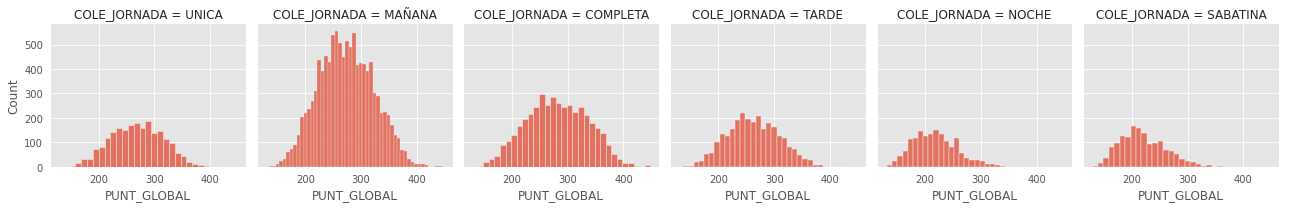

In [ ]:
plt.figure(figsize = (20,10))
g = sns.FacetGrid(df_clean, col="COLE_JORNADA",)
g.map_dataframe(sns.histplot, x="PUNT_GLOBAL")
g.add_legend()
plt.show()

<Figure size 1440x720 with 0 Axes>

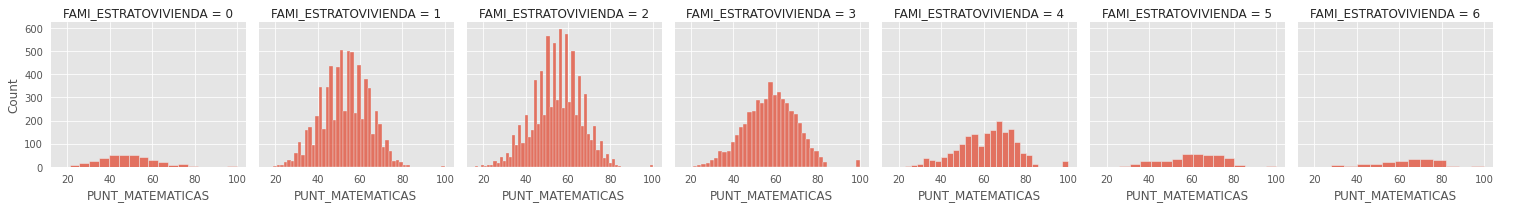

In [ ]:
plt.figure(figsize = (20,10))
g = sns.FacetGrid(df_clean, col="FAMI_ESTRATOVIVIENDA",)
g.map_dataframe(sns.histplot, x="PUNT_MATEMATICAS")
g.add_legend()
plt.show()

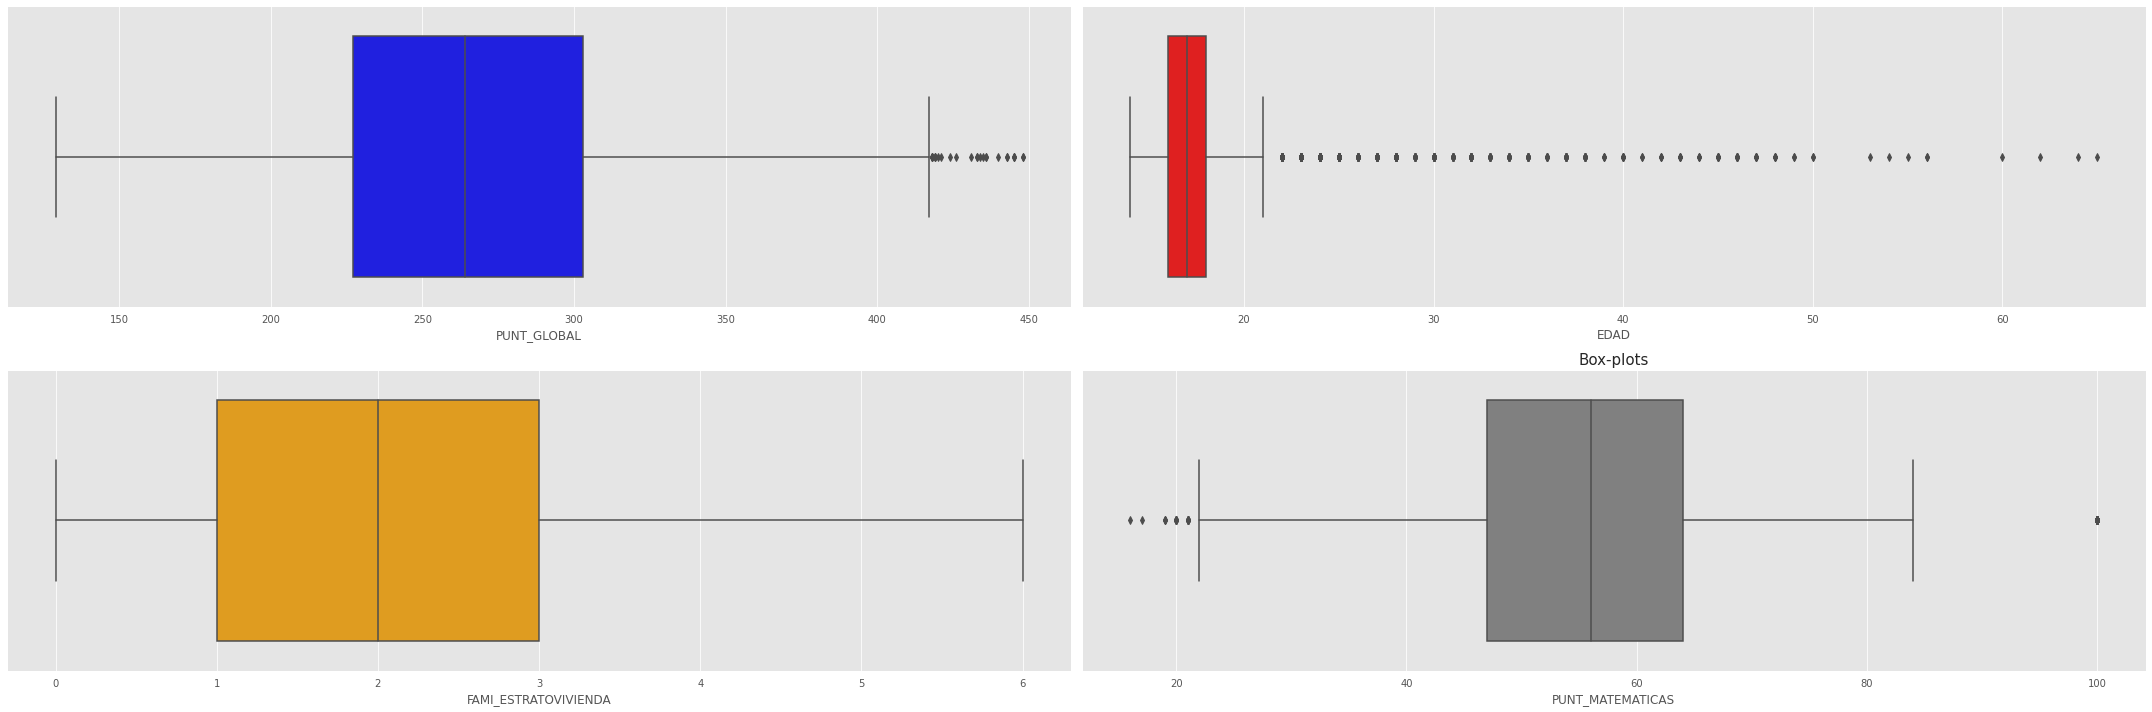

In [ ]:
## Box-Plots ##
fig, ax = plt.subplots(2,2,figsize=(30,10))
sns.boxplot(x = 'PUNT_GLOBAL', orient = "h", data = df_clean, ax = ax[0,0], color = "blue")
sns.boxplot(x = 'FAMI_ESTRATOVIVIENDA', data = df_clean, orient = "h", ax = ax[1,0], color = 'orange' )
sns.boxplot(x = 'EDAD', data = df_clean, ax = ax[0,1], color = 'red')
sns.boxplot(x = 'PUNT_MATEMATICAS', orient = "h", data = df_clean, ax = ax[1,1], color = "grey")
plt.title('Box-plots', fontsize = 15)
fig.tight_layout()
plt.show()

In [ ]:
df_clean.shape

(23095, 25)